# Executive Summary
In our project, we analyzed airline customer satisfaction data from Kaggle.com, collecting 23 factors about their flight experience. The way that our model works is that it takes in all of the data and, using an algorithm (random forest classifier), it tries to predict first what are the most important factors that airlines should consider. To validate our model, we cross-validated our predictions through testing and training the data. We also tried to eliminate factors to focus on certain factors through RFE, but realized that it created a significant decline in our accuracy. Our predictions of user satisfaction do a relatively great job of matching the actual customer satisfaction ratings with an accuracy score of 96%. We suggest that the model is rather accurate, but for real-world applications, there are some underlying biases within the data.


# Ethical Considerations 
All passengers have unique flying experiences with different airlines. Our program aims to help stakeholders, such as airlines and airports, understand how they can improve customer satisfaction to ensure returning customers and profitability. Additionally, our findings would provide valuable insights to other companies in the transportation and travel industries about specific enhancements that would boost their clients' experiences.

This [dataset](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction), retrieved from Kaggle, is based on an airline passenger satisfaction survey. To protect participants' privacy, all volunteers are assigned a unique ID to remain anonymous. The survey collected data about individuals' ratings of specific airline services and overall satisfaction for analysis. The data is a cleaned and modified version of the [Passenger Satisfaction dataset](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction).

It is unclear whether there are biases in selecting participants and collecting data. We assume that all surveys were sent to all passengers from various airlines after their flights. Participation in the survey is voluntary and optional for all users. Participants have the right to skip any questions and withdraw at any time during the survey process. 


# Introduction 
The Covid-19 pandemic has caused severe damage to the travel industry, resulting in loss of revenues and bankruptcies. According to the [World Travel and Tourism Council](https://www.wttc.com/pandemic/), the travel and tourism sector experienced a decrease of \\$4.5 trillion in the global GDP with a loss of 62 million jobs worldwide. In addition, the International Air Transport Association reported that airlines worldwide had lost \\$126.4 billion in [2020](https://www.iata.org/en/pressroom/pr/2021-02-03-02/), followed by a loss of \\$47.7 billion in [2021](https://www.iata.org/en/pressroom/pr/2021-05-19-02/).

As more countries are easing travel restrictions and opening up to tourists after the Covid-19 pandemic, more and more people are traveling globally. Despite the increased demand for air travel, airline customer satisfaction rates are decreasing due to rising ticket prices and overcrowding at airports. In a survey conducted by [Airports Council International](https://aci.aero/news/2020/09/29/aci-world-releases-results-of-global-survey-on-state-of-the-airport-industry/), 40% of the respondents stated that their airport experience had worsened due to the pandemic, and many were frustrated with the airport procedures and wait times. Furthermore, some of the airline services have decreased. According to [CNN](https://www.cnn.com/travel/article/airline-satisfaction-plummets-covid-intl-hnk-dst/index.html), there was a “decrease in food and beverage satisfaction in premium economy and business and the fact that many airlines didn’t serve alcohol on board for much of last year”.

As mentioned previously in the Ethical Considerations section, this project seeks to help the air travel industry better its services to achieve good customer satisfaction. We will cluster the passengers into sets of classes based on the class of ticket that they purchased. Doing this allows us to discover if there are any trends among their overall satisfaction. The machine learning methods we use will take different factors of satisfaction into account to give us an understanding of the importance of each variable in determining customer satisfaction. 

# Data description  
Data set comes from Kaggle.com which consists of a csv file of customer’s satisfaction of their airline experience. There are 23 factors that led to the customer’s satisfaction.  <br> 

<u> **Features** </u> <br> 
**Gender:** Gender of the passengers (Female, Male)  <br> 
**Customer Type:** The customer type (Loyal customer, disloyal customer)  <br> 
**Age:** The actual age of the passengers  <br> 
**Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)  <br> 
**Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)  <br> 
**Flight distance:** The flight distance of this journey  <br> 
**Inflight wifi service:** Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)  <br> 
**Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient  <br> 
**Ease of Online booking:** Satisfaction level of online booking  <br> 
**Gate location:** Satisfaction level of Gate location  <br> 
**Food and drink:** Satisfaction level of Food and drink  <br> 
**Online boarding:** Satisfaction level of online boarding  <br> 
**Seat comfort:** Satisfaction level of Seat comfort  <br> 
**Inflight entertainment:** Satisfaction level of inflight entertainment <br> 
**On-board service:** Satisfaction level of On-board service  <br> 
**Leg room service:** Satisfaction level of Leg room service  <br> 
**Baggage handling:** Satisfaction level of baggage handling  <br> 
**Check-in service:** Satisfaction level of Check-in service  <br> 
**Inflight service:** Satisfaction level of inflight service  <br> 
**Cleanliness:** Satisfaction level of Cleanliness  <br> 
**Departure Delay in Minutes:** Minutes delayed when departure  <br> 
**Arrival Delay in Minutes:** Minutes delayed when Arrival  <br> 
**Satisfaction:** Airline satisfaction level (Satisfaction, neutral or dissatisfaction)  <br> 


In [28]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE

In [29]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [30]:
test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [31]:
train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Before incorporating any machine learning algorithms into the dataset, we must clean the data by eliminating any rows with missing information. We have also decided to drop the 'id' and 'Unnamed: 0' columns because they are redundant and unnecessary for our model.

In [32]:
df = pd.concat([train, test], axis=0, sort=False)
df = df.reset_index(drop=True)
df = df.dropna()

In [33]:
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


Each individual chart (shown below) is a histogram of all the variables from the data. Since ‘Age’, ‘Flight Distance’, ‘Departure’, and ‘Arrival Delay’ are all numerical values, the values will be standardized by a standard scalar or MinMax Scaler. Meanwhile, all of the other variables are categorical. They are identified by survey variables ranging from 1 being a bad experience to 5 being a great experience

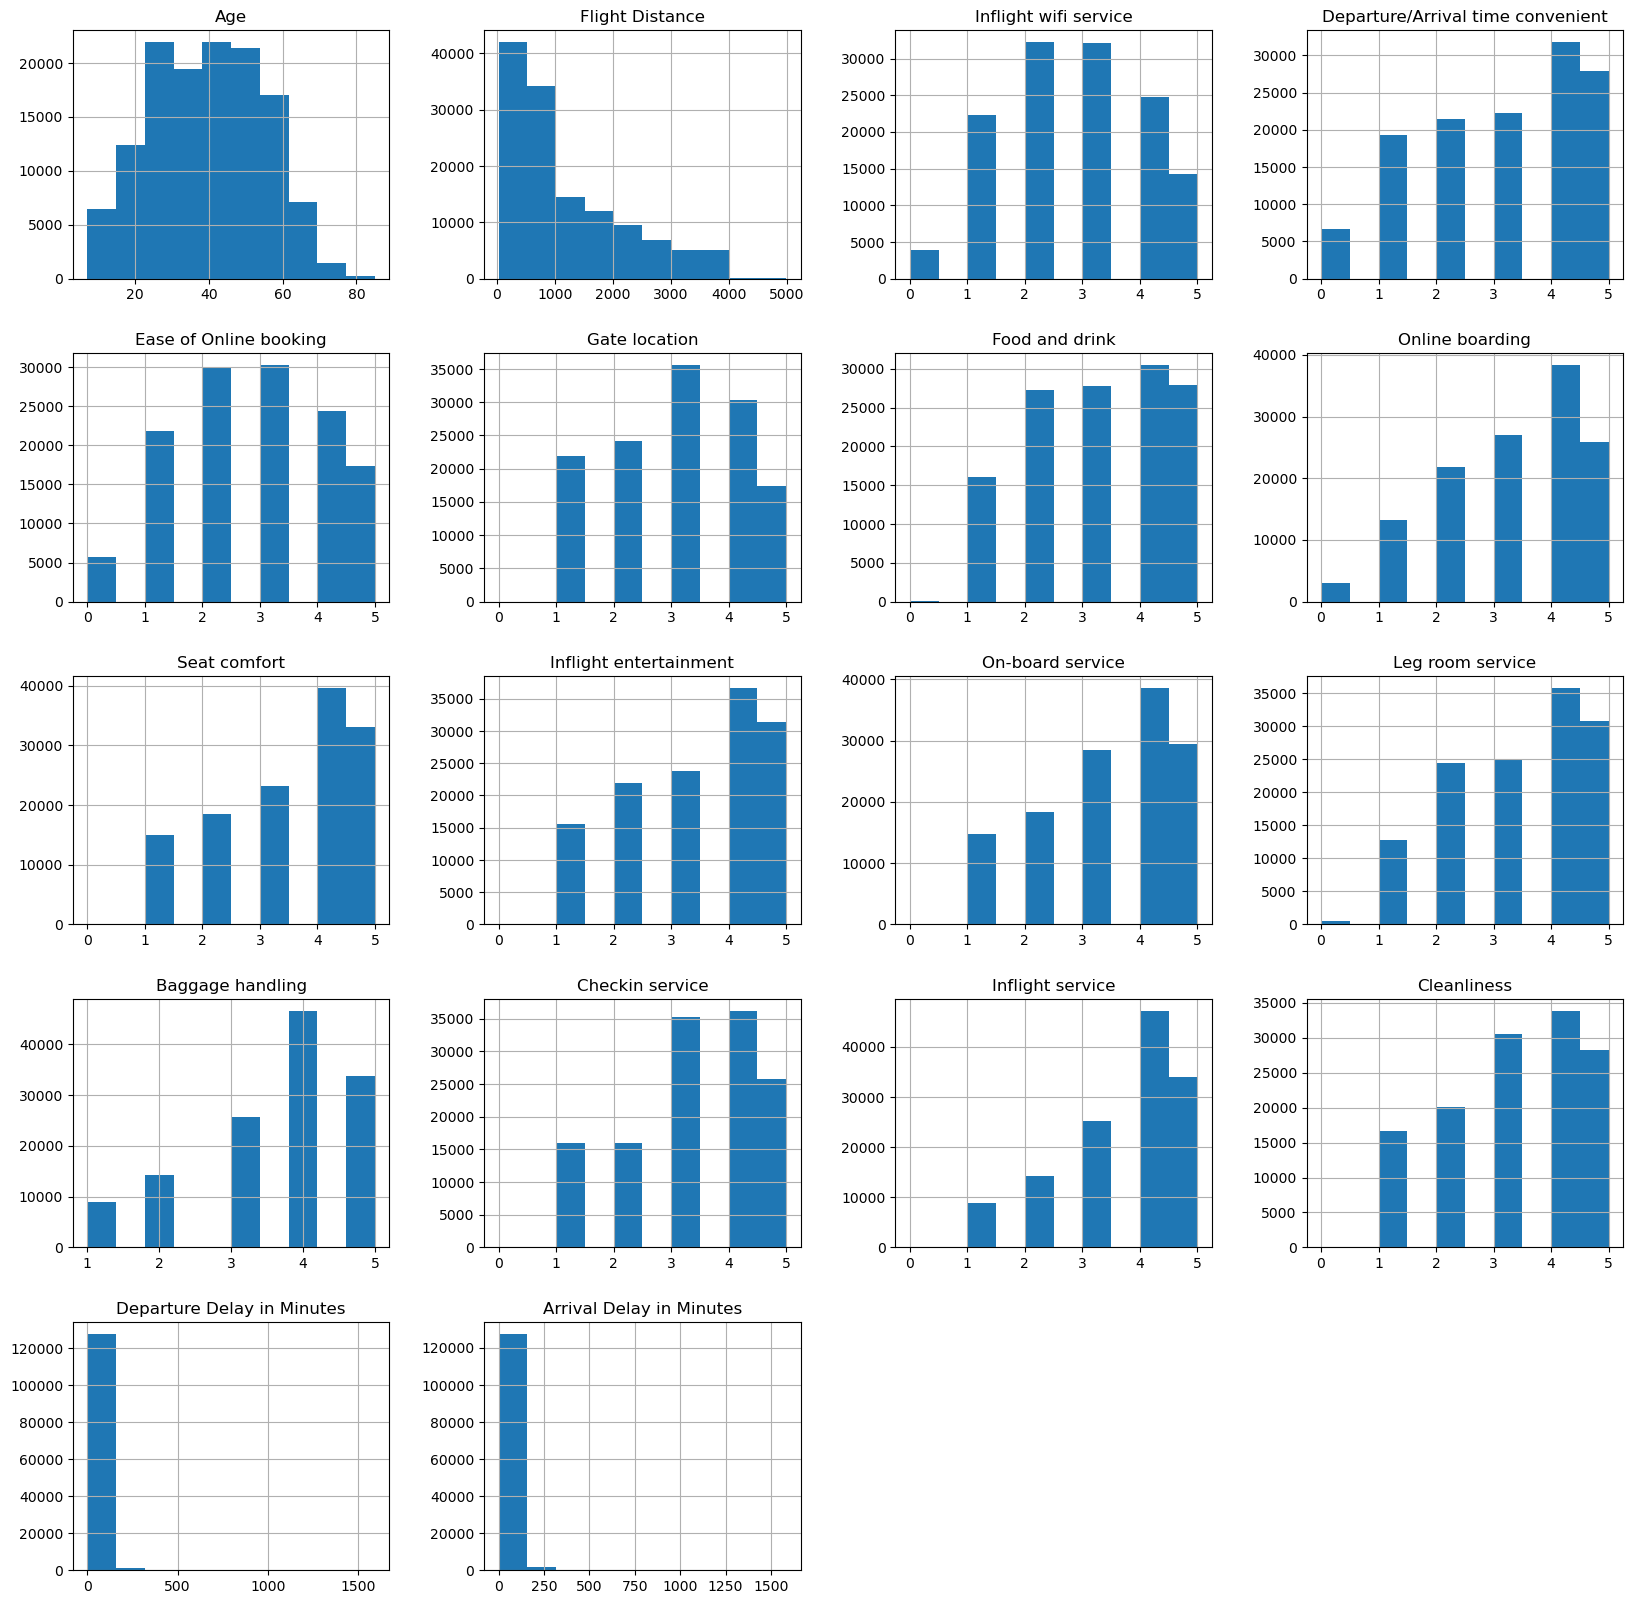

In [7]:
# create histogram of all variables
df.hist(figsize=(20,20))
plt.show()

Afterwards, we split the data into two groups: categorical and numerical data. Before any hardcoding was implemented, we conducted a thorough data types check. Our analysis revealed that 'Gender', 'Customer Type', 'Type of Travel', 'Class', and 'Satisfaction' are object data types. To be more specific, they are strings when referring to the printed dataset from the Data Description section. Meanwhile, all other data are integers or floats. However, only the 'Age', 'Flight Distance', 'Departure', and 'Arrival Delay' columns are numerical data. The remaining variables are categorical data from the survey variables ranging from 1 to 5, signifying 'bad experience' to 'great experience', respectively.

In [8]:
# prior to hardcoding
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

To correct the data type, we hardcoded all object data types as 0, 1, or 2, each with its respective meaning, as shown in the code:


In [9]:
df['Customer Type'] = df['Customer Type'].replace({'Loyal Customer': 1,'disloyal Customer': 0})
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['Type of Travel'] = df['Type of Travel'].replace({'Business travel': 0, 'Personal Travel': 1})
df['Class'] = df['Class'].replace({'Business': 0, 'Eco': 1, 'Eco Plus': 2})
df['satisfaction'] = df['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0})
df = df[df['Customer Type'].isin([0, 1])]
df = df[df['Gender'].isin([0, 1])]
df = df[df['Type of Travel'].isin([0, 1])]
df = df[df['Class'].isin([0, 1, 2])]
df = df[df['satisfaction'].isin([0, 1])]

Next, we corrected the mapping following the same binary as the object data type. Additionally, we hardcoded the categorical data types to change from integers to strings.

In [10]:
#Mapping 
ClassMap = {0:'Business', 1:'Eco', 2:'Eco Plus'}
SatisfactionMap = {0:'neutral or dissatisfied', 1:'satisfied'}
df['Class'] = df['Class'].map(ClassMap)
df['satisfaction'] = df['satisfaction'].map(SatisfactionMap)
df['Gender'] = df['Gender'].astype(str)
df['Customer Type'] = df['Customer Type'].astype(str)
df['Type of Travel'] = df['Type of Travel'].astype(str)
df['Inflight wifi service'] = df['Inflight wifi service'].astype(str)
df['Departure/Arrival time convenient'] = df['Departure/Arrival time convenient'].astype(str)
df['Ease of Online booking'] = df['Ease of Online booking'].astype(str)
df['Gate location'] = df['Gate location'].astype(str)
df['Food and drink'] = df['Food and drink'].astype(str)
df['Online boarding'] = df['Online boarding'].astype(str)
df['Seat comfort'] = df['Seat comfort'].astype(str)
df['Inflight entertainment'] = df['Inflight entertainment'].astype(str)
df['On-board service'] = df['On-board service'].astype(str)
df['Leg room service'] = df['Leg room service'].astype(str)
df['Baggage handling'] = df['Baggage handling'].astype(str)
df['Checkin service'] = df['Checkin service'].astype(str)
df['Inflight service'] = df['Inflight service'].astype(str)
df['Cleanliness'] = df['Cleanliness'].astype(str)

As shown below, the data type for each column has been corrected in order for us to implement the machine learning algorithms and interpret the data better.


In [11]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                 object
Departure/Arrival time convenient     object
Ease of Online booking                object
Gate location                         object
Food and drink                        object
Online boarding                       object
Seat comfort                          object
Inflight entertainment                object
On-board service                      object
Leg room service                      object
Baggage handling                      object
Checkin service                       object
Inflight service                      object
Cleanliness                           object
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

We dummified the data for each categorical column, converting them into a set of binary variables. Since the majority of the machine learning algorithms are designed to work with numerical data, we had to dummify the data to use them as input features for predictions and other data processing models. 

In [12]:
# identify categorical cols
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_columns

df_categorical = pd.get_dummies(df[categorical_columns], drop_first=True)
df_categorical


,Gender_1,Customer Type_1,Type of Travel_1,Class_Eco,Class_Eco Plus,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,satisfaction_satisfied
0,False,True,True,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
2,True,True,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,True
3,True,True,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
129876,False,True,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
129877,True,True,True,True,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
129878,False,True,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,True


From the dataset, we count the satisfications from the passengers.

In [13]:
# calulate the percentage of satistfaction_satisfied = 1
df['satisfaction'].value_counts(normalize=True)


satisfaction
neutral or dissatisfied    0.565501
satisfied                  0.434499
Name: proportion, dtype: float64

For the numerical columns, we utilized StandardScaler technique to standardize the scale of the data, making it easier for comparison. This transformed the data so that the variables will have a normal distribution with 0 mean and unit variance. The StandardScaler technique is an essential step in the process because it prevents biased or inaccurate results, which can improve the performance and accuracy of machine learning algorithms. In addition, it reduces the impact of outliers in the model.

In [14]:
df_numerical = df.drop(categorical_columns, axis=1)
df_numerical

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0
...,...,...,...,...
129875,34,526,0,0.0
129876,23,646,0,0.0
129877,17,828,0,0.0
129878,14,1127,0,0.0


In [15]:
# standardize tthe scale
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_numerical)
scaled_df = pd.DataFrame(scaled_df, columns=df_numerical.columns)
scaled_df

/Users/evanchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/evanchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,-1.748219,-0.731999,0.273026,0.075623
1,-0.954439,-0.957550,-0.359673,-0.236345
2,-0.888290,-0.048329,-0.386036,-0.392329
3,-0.954439,-0.629749,-0.096049,-0.158353
4,1.426902,-0.978601,-0.386036,-0.392329
...,...,...,...,...
129482,-0.359104,-0.665837,-0.386036,-0.392329
129483,-1.086735,-0.545543,-0.386036,-0.392329
129484,-1.483625,-0.363098,-0.386036,-0.392329
129485,-1.682070,-0.063365,-0.386036,-0.392329


After preparing the numerical and categorical datasets, we combined them into a new table that we will use for the machine learning algorithms


In [16]:
# combine both tables
all_data = pd.concat([df_categorical, scaled_df], axis=1)
all_data

,Gender_1,Customer Type_1,Type of Travel_1,Class_Eco,Class_Eco Plus,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,...,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,satisfaction_satisfied,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,False,True,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,-1.748219,-0.731999,0.273026,0.075623
1,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,-0.954439,-0.957550,-0.359673,-0.236345
2,True,True,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,-0.888290,-0.048329,-0.386036,-0.392329
3,True,True,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,-0.954439,-0.629749,-0.096049,-0.158353
4,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,True,1.426902,-0.978601,-0.386036,-0.392329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.483625,-1.004665,-0.386036,-0.392329
128037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.030012,0.301526,-0.386036,-0.392329
128205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.359104,-0.864322,-0.386036,-0.392329
129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.822142,-1.042758,-0.386036,-0.392329


We created a pie chart to demonstrate the satisfied percentage vs unsatisfied percentage.

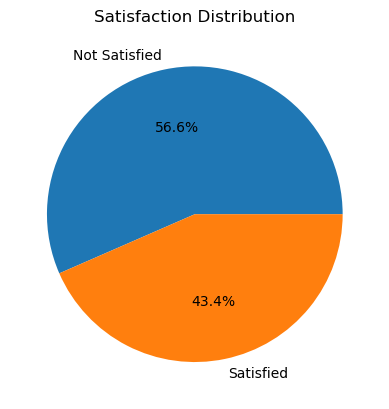

In [17]:
#create a pie chart with the percentage of all_data['satisfaction_satisfied'] is 1 or 0
# Count the number of occurrences of each value in the 'satisfaction_satisfied' column
value_counts = all_data['satisfaction_satisfied'].value_counts()

# Create a pie chart with the percentage of each value
plt.pie(value_counts, labels=['Not Satisfied', 'Satisfied'], autopct='%1.1f%%')
plt.title('Satisfaction Distribution')
plt.show()

The heatmap of the correlation of all of the variables cleaned to the satisfaction_satisfied variable. It shows that a better online boarding system and good/faster inflight wifi would possibly lead to more percentage of satisfied customers.


<AxesSubplot: >

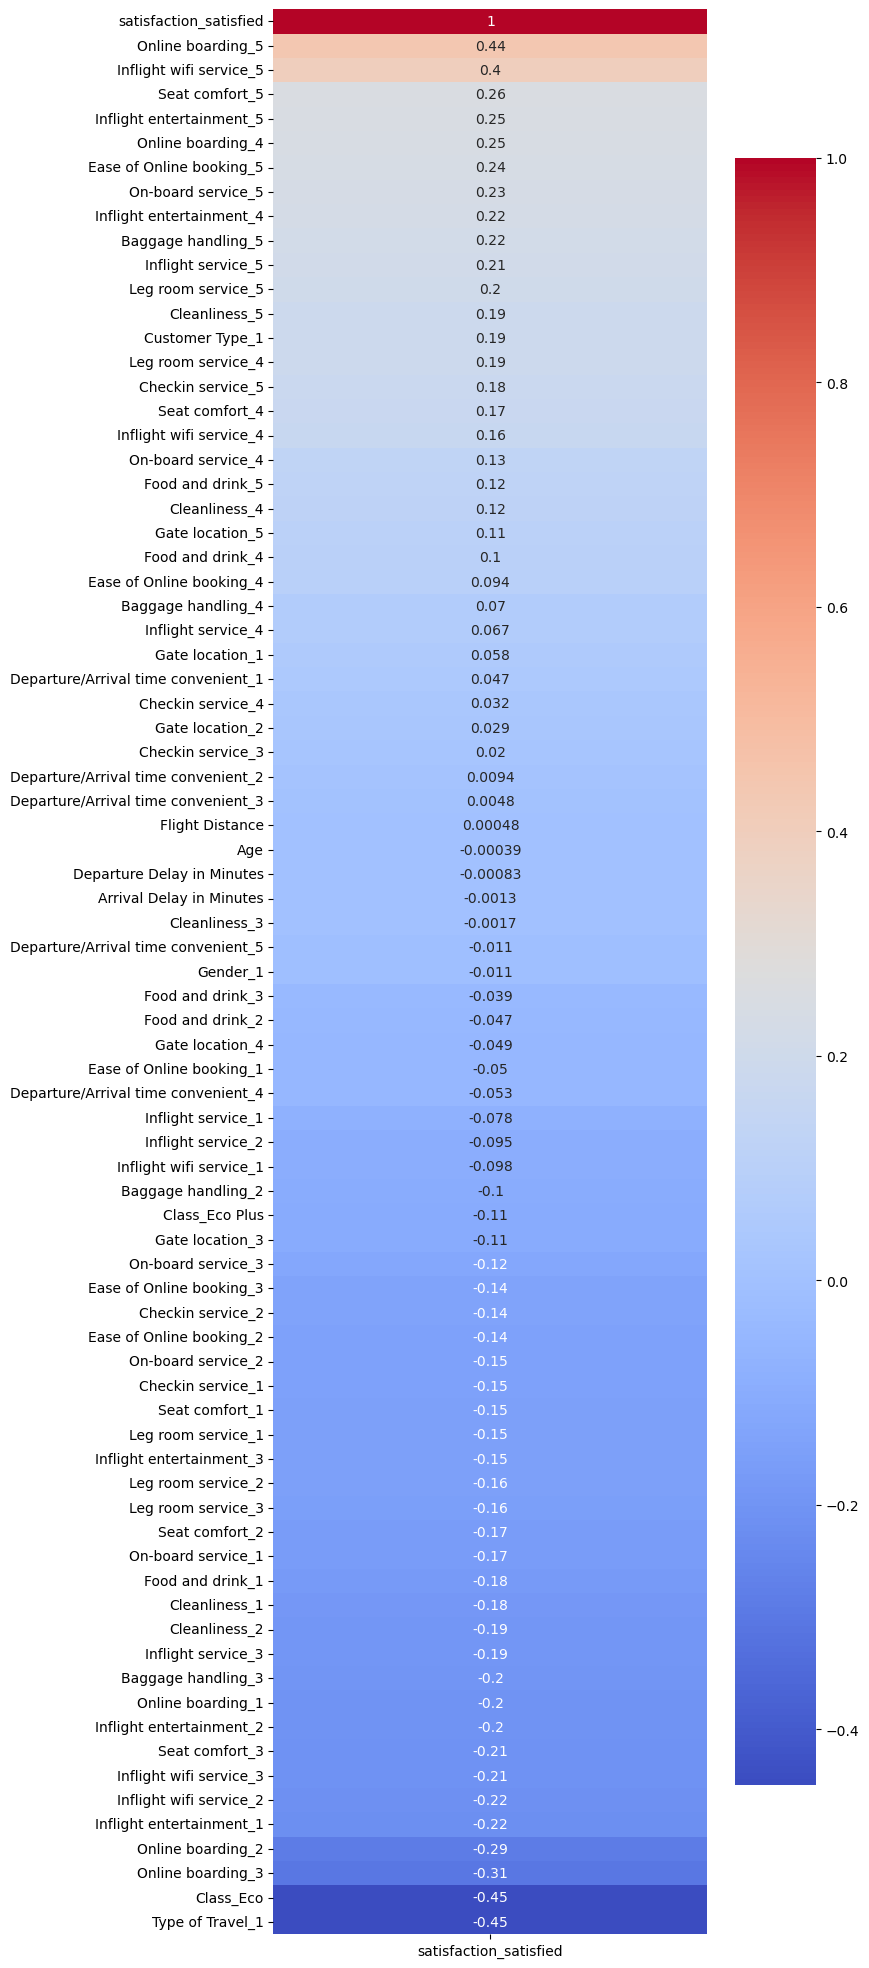

In [18]:
#create a heatmap of the correlation of the varibales with the satisfaction
plt.figure(figsize=(7,25))
sns.heatmap(all_data.corr()[['satisfaction_satisfied']].sort_values(by='satisfaction_satisfied', ascending=False), annot=True, cmap='coolwarm')


# Method

In [19]:
# reclean the data set to ensure there are no missing values
all_data = all_data.dropna()
df_predictors = all_data.drop('satisfaction_satisfied', axis=1)
target = all_data['satisfaction_satisfied']

Before starting any modeling, we split the data into 2 parts: test and train, with a split of 20% for test data and 80% for train data, which was deemed sufficient to properly test the model given the amount of data available.


In [23]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(df_predictors, target, test_size=0.2, random_state=42)
print('x_train', X_train.shape)
print('x_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)


x_train (103275, 78)
x_test (25819, 78)
y_train (103275,)
y_test (25819,)


The machine learning algorithm that we will be using to analyze the data is Random Forest Classification with Hyperparameter tuning and F1 score. We will explain the outcomes using recursive feature elimination, confusion matrix, and feature importance. 

In [21]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix
def confusion_mat(y_t, y_p):
    cnf_matrix = confusion_matrix(y_t, y_p)
    cf_df = pd.DataFrame(cnf_matrix, index = ['Actual 0', 'Actual 1'], columns = ['Predicted 0', 'Predicted 1'])
    sns.set(font_scale=1.4)
    plt.figure(figsize=(7,5))
    sns.heatmap(cf_df, annot=True, fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Random Forest Classification:
We are using Random Forest Classification to predict the features that contribute to customer satisfaction and to explore the relationships between different variables in the dataset. It will also provide estimates of feature importance, which we will use to interpret the results. For the Random Forest Classification, we applied hyperparameter tuning and set several parameters before training the dataset, including n_estimators, random_state, max_depth, min_samples_split, min_samples_leaf, max_features, and bootstrap. By applying hyperparameter tuning, we can control the complexity of the model and reduce the risks of overfitting and underfitting. <br>

The following explains each parameter: <br>

**n_estimators:** The number of trees in the forest. In this case, it's set to 100, which means that the algorithm will create 100 decision trees. <br>

**random_state:** The seed used by the random number generator. It's set to 42, which means that the algorithm will produce the same results every time it's run. <br>

**max_depth:** The maximum depth of each tree. In this case, it's set to 100, which means that the algorithm will create trees with a maximum depth of 100. <br>

**min_samples_leaf:** The minimum number of samples required to be at a leaf node. It's set to 1, which means that the algorithm will keep splitting nodes until each leaf contains only one sample. <br>

**max_features:** The number of features to consider when looking for the best split. In this case, it's set to 'auto', which means that the algorithm will consider all features for each split. <br>

**bootstrap:** Whether or not to bootstrap the samples used for each tree. It's set to True, which means that the algorithm will randomly sample the data with replacement to create each tree. <br>


In [22]:
# Random forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

classifier = RandomForestClassifier(n_estimators=100, random_state=42, 
                                    max_depth=100, 
                                    min_samples_leaf=1, max_features='auto', 
                                    bootstrap=True)
# fit the RFE object to the training data
model_RF = classifier.fit(X_train, y_train)

# make predictions on the test set
y_pred_RF = model_RF.predict(X_test)
print(classification_report(y_test, y_pred_RF))

print(confusion_mat(y_test, y_pred_RF))

/Users/evanchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


ValueError: Unknown label type: 'unknown'

In [ ]:
importances = model_RF.feature_importances_
# create a bar graph of the feature importances sorted by importance
indices = np.argsort(importances)[::-1][:15] # select the top 20 features
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.bar(range(15), importances[indices], color='b', align='center')
plt.xticks(range(15), X_train.columns[indices], rotation=90)
plt.xlim([-1, 15]) # set the x-axis limit to show only the top 20 features
plt.show()


### Recursive Feature Elimination (RFE):
We reconducted the Random Forest Classifier with Recursive Feature Elimination for comparison and to gain a deeper understanding of the variable importance. RFE is a feature selection method that removes any weak features from the dataset. It refits the model and re-identifies the best features to focus on. RFE reduces the run time for machine learning algorithms, and it removes any irrelevant features that will decrease the model’s performance, which results in a more accurate prediction. We specified the number of features to select in our model. Thus, only the top-specified number of features will be fitted and trained in the data set.


In [ ]:
# select the estimator (classifier) to use for feature selection
estimator = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=100, 
                                    min_samples_leaf=1, 
                                    max_features='auto', bootstrap=True)

# create the RFE object and specify the number of features to select
rfe = RFE(estimator, n_features_to_select=10, step=1)

# fit the RFE object to the training data
rfe.fit(X_train, y_train)

# get the top features selected by RFE
selected_features = X_train.columns[rfe.support_]
print('Selected features:', selected_features)


In [ ]:
# create a new DataFrame with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# create a new random forest model with the selected features
classifier_selected = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=100, 
                                              min_samples_leaf=1, 
                                              max_features='auto', bootstrap=True)
model_RF_selected = classifier_selected.fit(X_train_selected, y_train)

# make predictions on the test set
y_pred_RF_selected = model_RF_selected.predict(X_test_selected)

# evaluate the performance of the model
print(classification_report(y_test, y_pred_RF_selected))
confusion_mat(y_test, y_pred_RF_selected)

# get the feature importances
importances_selected = model_RF_selected.feature_importances_

# create a bar graph of the feature importances sorted by importance
indices_selected = np.argsort(importances_selected)[::-1][:len(selected_features)]
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.bar(range(len(selected_features)), importances_selected[indices_selected], color='b', align='center')
plt.xticks(range(len(selected_features)), selected_features[indices_selected], rotation=90)
plt.show()


# Result
To interpret the results, we use classification reports to show the F1 score, confusion matrix to show the accuracy rate, and the feature importance to identify the most relevant features in the dataset. 
Print out the classification report with confusion matrix and feature importance without RFE

To recall in our presentation, F1 score is a commonly used metric to evaluate the performance of a classification model. It combines the precision and recall of the model into a single score. It ranges from 0 to 1, with a higher score indicating better performance. 

F1 score is calculated as: F1 = 2 * (precision * recall) / (precision + recall)

In the Random Forest Classifier without RFE, we can see that the F1 score for predicting each binary is 0.96 and 0.95 for binaries 0 and 1, respectively, with an overall accuracy F1 score of 0.96. This indicates that the model has correctly identified the true positives while minimizing the false positives and false negatives. Following the confusion matrix and the report, we see the feature importance chart. As portrayed in the chart, “type of travel_1”, “online boarding_5”, “class_eco”, and “inflight_wifi_service_5” have the highest importance values. “Type of travel_1” refers to personal traveling. “Online boarding_5” and “inflight_wifi_service_5” suggest that customers are satisfied with the boarding process and the wifi services. The “class_eco” refers to the economy class seats.

                   precision    recall  f1-score   support

              0.0       0.95      0.98      0.96     14719
              1.0       0.97      0.93      0.95     11100

         accuracy                           0.96     25819
        macro avg       0.96      0.95      0.96     25819
     weighted avg       0.96      0.96      0.96     25819

![Confusion Matrix Without RFE](https://i.ibb.co/Q6YCVmf/Confusion-Without-RFE.png)


![Feature Importance without RFE](https://i.ibb.co/4Nm5ZF3/Feat-Without-RFE.png)

In the Random Forest Classifier with RFE, the F1 score for predicting each binary is 0.89 and 0.84 for binaries 0 and 1, respectively, with an accuracy F1 scorer of 0.87. 
These F1 scores are lower than the F1 scores from Random Forest Classifier without RFE. This change may have been caused by the accidental removal of important features while retaining the irrelevant ones. It may also be caused by eliminating too many features, resulting in an inadequate number of features to capture the underlying data accurately. Following the confusion matrix and the report, we see a slightly different feature importance chart. It shows that “flight distance”, “type of travel_1”, “online boarding_5”, “class_eco”, and “inflight wifi service_5” have the highest importance. Compared to the feature importance graph without RFE, the ranking of “flight distance” is the only difference in the chart. It was previously ranked 18th; however, it is currently the most relevant feature when predicting customer satisfaction.


                   precision    recall  f1-score   support

             0.0       0.87      0.91      0.89     14719
             1.0       0.87      0.82      0.84     11100

         accuracy                           0.87     25819
        macro avg       0.87      0.86      0.86     25819
     weighted avg       0.87      0.87      0.87     25819

![Confusion Matrix With RFE](https://i.ibb.co/7Gg8xqg/Confusionwith-RFE.png)
![Feature Importance With RFE](https://i.ibb.co/9px3f1W/Feat-With-RFE.png)

# Discussion
Our data analysis revealed the top five improvements that airlines should focus on: online boarding experience, inflight service, class experience, inflight entertainment, and wifi experiences. These results are expected, since these five factors are all essential parts of a customer’s flight experience and are frequently advertised by quality airlines. 

However, these results should not be taken at face-value since biases exist in the data. For example, the dataset contains data for both loyal and disloyal customers, with loyal customers being customers who consistently travel with one airline and disloyal customers being those who travel with many different airlines. Since the data considers both types of customers, disloyal customers may have had increased dissatisfaction with an airline since their standards could have been impacted by experiences with other airlines. Another bias that exists in the data is the type of travel that customers were engaging in. Customers engaged in both business travel and in personal travel. Business travel tends to be serious and for work-related reasons, while personal travel tends to be relaxing and for enjoyment. Customers flying for personal enjoyment reasons may have been more satisfied than customers who were traveling for serious work-related reasons. Another bias that exists in the dataset is the class of ticket that the customer purchased. The dataset considers classes that include First, Business, Econ, Econ plus, etc. All of these classes provide different services at different qualities, with the highest class seats receiving better service on flights. Due to this, customers who purchased premium seats may tend to have better experiences on their flights than customers who do not. 

## Takeaways
The main takeaways of this project suggest that airlines can take actions to improve customer satisfaction. These actions, mentioned above, are to improve online boarding experience, inflight service, class experience, inflight entertainment, and wifi experiences. We are confident that these actions are justified because the feature importance analysis revealed that these were the most important factors that influence customer satisfaction. Before such action is taken, some questions that might need to be answered are whether taking these actions are financially possible for the airlines, and whether the quality of the flights would increase ticket prices (which in turn may decrease customer satisfaction instead of increasing it). 

## Challenges
Some challenges that were encountered during this project include learning new machine learning methods, such as F1 analysis, RFE, and etc. We learned these new methods so that we could obtain our desired results while learning and applying new methods of data analysis. Other challenges include time management with a difficult project and working with a group on a code when only one person could physically type on the Jupyter Notebook file at a time. 
